# Load packages.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# Load the dataset for this chunk (2/10).
Chunk 1 used for fine tuning.

In [2]:
df = pd.read_csv('C:/Users/rmcarri/OneDrive - Emory University/NHANES/Macronutrients LLMs/03.Results/Adolescents/FT 10epochs v2/df_val_with_answers_chunk2.csv')
df

,Unnamed: 0,SEQN,day,diet,DRxIKCAL,DRxIPROT,DRxICARB,DRxISUGR,DRxIFIBE,DRxITFAT,...,pir,edu,is_preg,self_db,self_ht,smoker,id,Expected_Output,LLM_Original,LLM_Fine_Tuned
0,0,26715,2,"ICE CREAM, REGULAR, NOT CHOCOLATE (267); PORK ...",3500,146.79,447.32,289.24,12.0,126.41,...,2.85,NaN,0.0,0.0,0.0,NaN,26715_NHANES_2003_2004,3500; 146.79; 447.32; 289.24; 12.0; 126.41,1989; 100.58; 239.95; 129.95; 15.9; 79.58,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
1,1,26717,2,"MILK, COW'S, FLUID, 2% FAT (350.75); MILK, COW...",1249,56.36,167.72,47.82,9.4,38.99,...,0.39,NaN,0.0,0.0,NaN,NaN,26717_NHANES_2003_2004,1249; 56.36; 167.72; 47.82; 9.4; 38.99,1989.67; 79.93; 249.55; 109.85; 19.2; 69.89,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
2,2,26722,2,QUESO FRESCO (HISPANIC-STYLE FARMER CHEESE) (3...,4241,93.05,621.38,215.24,35.3,159.89,...,1.62,NaN,0.0,0.0,0.0,NaN,26722_NHANES_2003_2004,4241; 93.05; 621.38; 215.24; 35.3; 159.89,1996.56; 78.90; 258.45; 134.56; 19.00; 74.56,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
3,3,26724,2,"MILK, COW'S, FLUID, WHOLE (533.75); MILK, COW'...",3258,146.99,401.69,301.19,13.9,120.14,...,0.91,NaN,0.0,0.0,NaN,NaN,26724_NHANES_2003_2004,3258; 146.99; 401.69; 301.19; 13.9; 120.14,1995; 101.92; 238.97; 159.57; 19.5; 65.98,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
4,4,26727,2,"MILK, COW'S, FLUID, 2% FAT (488); ICE CREAM BA...",4763,205.13,729.14,321.59,68.5,119.33,...,5.00,NaN,0.0,0.0,0.0,NaN,26727_NHANES_2003_2004,4763; 205.13; 729.14; 321.59; 68.5; 119.33,1997; 100.96; 298.97; 197.98; 24.9; 49.99,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,1123,32384,2,"HAMBURGER, 1/4 LB MEAT W/ MAYO & TOMATO, ON BU...",1807,68.25,208.25,116.53,9.6,79.95,...,1.68,NaN,0.0,0.0,NaN,NaN,32384_NHANES_2005_2006,1807; 68.25; 208.25; 116.53; 9.6; 79.95,1987; 59.98; 219.96; 190.96; 3.9; 72.98,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
1124,1124,32395,2,"MILK, SOY, READY-TO-DRINK, NOT BABY (336.88); ...",1350,61.41,194.92,24.72,19.4,37.74,...,0.88,NaN,0.0,0.0,0.0,NaN,32395_NHANES_2005_2006,1350; 61.41; 194.92; 24.72; 19.4; 37.74,1386.56; 64.97; 157.95; 39.92; 19.5; 54.58,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
1125,1125,32399,2,"MILK, COW'S, FLUID, 2% FAT (396.5); MILK, COW'...",1827,72.87,186.28,118.32,4.4,88.30,...,2.89,NaN,0.0,0.0,NaN,NaN,32399_NHANES_2005_2006,1827; 72.87; 186.28; 118.32; 4.4; 88.3,1798; 74.93; 199.91; 100.92; 10.2; 69.97,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...
1126,1126,32400,2,"FRUIT SMOOTHIE DRINK, W/ FRUIT OR JUICE & DAIR...",1245,54.01,158.33,69.76,10.9,46.32,...,3.50,NaN,0.0,0.0,0.0,NaN,32400_NHANES_2005_2006,1245; 54.01; 158.33; 69.76; 10.9; 46.32,1443; 56.96; 194.56; 109.27; 19.5; 30.25,\n\n\n### Input:\nUSER:\n\nPlease analyze the ...


# Check if all the rows from the vanilla model are in the desired output format.
If not in the desired output format, then need post-processing.

In [3]:
# Function to validate the pattern
def validate_pattern(value):
    parts = [part.strip() for part in value.split(';')]
    expected_count = 6  # Expected number of values
    
    # Check number of values
    if len(parts) != expected_count:
        return False
    
    # Check each value is a valid number
    for part in parts:
        try:
            float(part)
        except ValueError:
            return False
            
    return True

# Apply validation and create boolean mask
mask = df['LLM_Original'].apply(validate_pattern)

# Show inconsistent rows
inconsistent_rows = df[~mask]
print("Inconsistent rows:")
# Show summary statistics
print("\nSummary:")
print(f"Total rows: {len(df)}")
print(f"Inconsistent rows: {len(inconsistent_rows)}")
print(f"Consistent rows: {sum(mask)}. I.e., all rows are as expected, not need to post-process.")
inconsistent_rows

Inconsistent rows:

Summary:
Total rows: 1128
Inconsistent rows: 0
Consistent rows: 1128. I.e., all rows are as expected, not need to post-process.


,Unnamed: 0,SEQN,day,diet,DRxIKCAL,DRxIPROT,DRxICARB,DRxISUGR,DRxIFIBE,DRxITFAT,...,pir,edu,is_preg,self_db,self_ht,smoker,id,Expected_Output,LLM_Original,LLM_Fine_Tuned


In [4]:
# Drop inconsistent rows
df = df.drop(inconsistent_rows.index)
df.shape

(1128, 24)

# The output from the fine tuned model needs post-processing.
Post-process the output of the fine-tuned model.

Verify the new (post-processed) output is accurate.

Drop rows that cannot be post-processed (i.e., in a completely wrong format or did not yield the desired information).

In [5]:
# Post-process the LLM_Fine_Tuned content
def extract_numbers_after_response(text):
    response_section = text.split("### Response:")[-1].strip()   # Find everything after "### Response:"
    return "; ".join(response_section.split(";"))   # Extract the numbers and join them with semicolons

# Apply the function to your DataFrame column
df['LLM_Fine_Tuned'] = df['LLM_Fine_Tuned'].apply(extract_numbers_after_response)

In [6]:
# Function to validate the pattern
def validate_pattern(value):
    parts = [part.strip() for part in value.split(';')]
    expected_count = 6  # Expected number of values
    
    # Check number of values
    if len(parts) != expected_count:
        return False
    
    # Check each value is a valid number
    for part in parts:
        try:
            float(part)
        except ValueError:
            return False
            
    return True

# Apply validation and create boolean mask
mask = df['LLM_Fine_Tuned'].apply(validate_pattern)

# Show inconsistent rows
inconsistent_rows = df[~mask]
print("Inconsistent rows:")
# Show summary statistics
print("\nSummary:")
print(f"Total rows: {len(df)}")
print(f"Inconsistent rows: {len(inconsistent_rows)}. I.e., these rows need post-processing.")
print(f"Consistent rows: {sum(mask)}. I.e., all rows are as expected, not need to post-process.")
inconsistent_rows

Inconsistent rows:

Summary:
Total rows: 1128
Inconsistent rows: 123. I.e., these rows need post-processing.
Consistent rows: 1005. I.e., all rows are as expected, not need to post-process.


,Unnamed: 0,SEQN,day,diet,DRxIKCAL,DRxIPROT,DRxICARB,DRxISUGR,DRxIFIBE,DRxITFAT,...,pir,edu,is_preg,self_db,self_ht,smoker,id,Expected_Output,LLM_Original,LLM_Fine_Tuned
25,25,26814,2,"MILK, COW'S, FLUID, 2% FAT (441.95); CHEESE, N...",2306,118.09,258.70,67.98,14.0,92.23,...,2.63,NaN,0.0,0.0,NaN,NaN,26814_NHANES_2003_2004,2306; 118.09; 258.7; 67.98; 14.0; 92.23,1989.56; 100.94; 203.45; 39.23; 19.6; 85.78,USER:\n\nPlease analyze the patient's dietary ...
28,28,26825,2,"MILK, COW'S, FLUID, 2% FAT (274.5); CHEESE, PR...",2815,68.82,386.33,189.60,16.3,116.15,...,2.36,NaN,0.0,0.0,0.0,NaN,26825_NHANES_2003_2004,2815; 68.82; 386.33; 189.6; 16.3; 116.15,1996.58; 69.96; 249.92; 108.96; 14.9; 79.88,USER:\n\nPlease analyze the patient's dietary ...
39,39,26886,2,"MILK, COW'S, FLUID, 2% FAT (518.5); SOUR CREAM...",3667,133.07,502.83,254.93,33.3,135.40,...,2.18,NaN,0.0,0.0,NaN,NaN,26886_NHANES_2003_2004,3667; 133.07; 502.83; 254.93; 33.3; 135.4,1999.56; 89.67; 249.89; 127.45; 24.34; 68.23,USER:\n\nPlease analyze the patient's dietary ...
42,42,26900,2,"MILK, CHOCOLATE, NFS (249.6); COFFEE CAKE, NFS...",816,19.52,118.37,57.56,8.4,30.69,...,1.38,NaN,0.0,0.0,0.0,NaN,26900_NHANES_2003_2004,816; 19.52; 118.37; 57.56; 8.4; 30.69,1394.56; 40.96; 199.62; 110.96; 10.9; 39.98,USER:\n\nPlease analyze the patient's dietary ...
50,50,26958,2,"MILK, COW'S, FLUID, 1% FAT (442.25); CHICKEN,T...",1944,94.93,185.27,90.82,20.3,92.25,...,2.23,NaN,0.0,0.0,0.0,NaN,26958_NHANES_2003_2004,1944; 94.93; 185.27; 90.82; 20.3; 92.25,1993; 89.94; 215.88; 37.97; 20.3; 71.89,USER:\n\nPlease analyze the patient's dietary ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,890,31178,2,"MILK, COW'S, FLUID, 1% FAT (244); MILK, COW'S,...",3031,98.78,429.70,249.89,14.9,108.02,...,4.07,NaN,0.0,0.0,NaN,NaN,31178_NHANES_2005_2006,3031; 98.78; 429.7; 249.89; 14.9; 108.02,1974.56; 89.48; 249.56; 104.27; 19.48; 69.78,USER:\n\nPlease analyze the patient's dietary ...
979,979,31629,2,"MILK, COW'S, FLUID, 2% FAT (320.25); MILK, CHO...",4656,205.17,616.93,216.73,31.7,158.13,...,0.84,NaN,0.0,0.0,0.0,NaN,31629_NHANES_2005_2006,4656; 205.17; 616.93; 216.73; 31.7; 158.13,1998; 101.98; 239.87; 101.98; 20.98; 79.98,USER:\n\nPlease analyze the patient's dietary ...
1040,1040,31951,2,"CHICKEN PATTY/FILLET/TENDERS, BREADED, COOKED ...",2032,73.83,209.84,71.33,12.4,101.31,...,5.00,NaN,0.0,0.0,NaN,NaN,31951_NHANES_2005_2006,2032; 73.83; 209.84; 71.33; 12.4; 101.31,1892; 69.95; 209.85; 100.85; 10.4; 59.95,USER:\n\nPlease analyze the patient's dietary ...
1045,1045,31977,2,"MILK, COW'S, FLUID, 2% FAT (366); BEEF SAUSAGE...",1744,48.25,242.54,146.39,4.7,66.13,...,0.78,NaN,0.0,0.0,NaN,NaN,31977_NHANES_2005_2006,1744; 48.25; 242.54; 146.39; 4.7; 66.13,1998.49; 79.65; 229.85; 147.95; 10.9; 59.95,USER:\n\nPlease analyze the patient's dietary ...


In [7]:
# Drop inconsistent rows
df = df.drop(inconsistent_rows.index)
df.shape

(1005, 24)

# Create the variables (columns) for the predicted energy and macronutrients.
Both from the vanilla model as well as the fine-tuned model.

In [8]:
# Assuming df is your DataFrame
column_names = ['DRxIKCAL_pred_orig', 'DRxIPROT_pred_orig', 'DRxICARB_pred_orig',
                'DRxISUGR_pred_orig', 'DRxIFIBE_pred_orig', 'DRxITFAT_pred_orig']

# Split the LLM_answer column and assign to new columns
df[column_names] = df['LLM_Original'].str.split('; ', expand=True)

# Clean up the data by converting strings to floats
df[column_names] = df[column_names].apply(pd.to_numeric)
df

,Unnamed: 0,SEQN,day,diet,DRxIKCAL,DRxIPROT,DRxICARB,DRxISUGR,DRxIFIBE,DRxITFAT,...,id,Expected_Output,LLM_Original,LLM_Fine_Tuned,DRxIKCAL_pred_orig,DRxIPROT_pred_orig,DRxICARB_pred_orig,DRxISUGR_pred_orig,DRxIFIBE_pred_orig,DRxITFAT_pred_orig
0,0,26715,2,"ICE CREAM, REGULAR, NOT CHOCOLATE (267); PORK ...",3500,146.79,447.32,289.24,12.0,126.41,...,26715_NHANES_2003_2004,3500; 146.79; 447.32; 289.24; 12.0; 126.41,1989; 100.58; 239.95; 129.95; 15.9; 79.58,3831; 150.1; 469.1; 285.51; 9.9; 156.1,1989.00,100.58,239.95,129.95,15.9,79.58
1,1,26717,2,"MILK, COW'S, FLUID, 2% FAT (350.75); MILK, COW...",1249,56.36,167.72,47.82,9.4,38.99,...,26717_NHANES_2003_2004,1249; 56.36; 167.72; 47.82; 9.4; 38.99,1989.67; 79.93; 249.55; 109.85; 19.2; 69.89,1595; 67.88; 215.11; 61.17; 10.2; 53.7,1989.67,79.93,249.55,109.85,19.2,69.89
2,2,26722,2,QUESO FRESCO (HISPANIC-STYLE FARMER CHEESE) (3...,4241,93.05,621.38,215.24,35.3,159.89,...,26722_NHANES_2003_2004,4241; 93.05; 621.38; 215.24; 35.3; 159.89,1996.56; 78.90; 258.45; 134.56; 19.00; 74.56,4031; 81.1; 669.8; 239.1; 32.0; 123.3,1996.56,78.90,258.45,134.56,19.0,74.56
3,3,26724,2,"MILK, COW'S, FLUID, WHOLE (533.75); MILK, COW'...",3258,146.99,401.69,301.19,13.9,120.14,...,26724_NHANES_2003_2004,3258; 146.99; 401.69; 301.19; 13.9; 120.14,1995; 101.92; 238.97; 159.57; 19.5; 65.98,3131; 139.1; 393.8; 291.1; 13.3; 110.61,1995.00,101.92,238.97,159.57,19.5,65.98
4,4,26727,2,"MILK, COW'S, FLUID, 2% FAT (488); ICE CREAM BA...",4763,205.13,729.14,321.59,68.5,119.33,...,26727_NHANES_2003_2004,4763; 205.13; 729.14; 321.59; 68.5; 119.33,1997; 100.96; 298.97; 197.98; 24.9; 49.99,4331; 199.1; 686.7; 245.51; 59.3; 93.2,1997.00,100.96,298.97,197.98,24.9,49.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,1123,32384,2,"HAMBURGER, 1/4 LB MEAT W/ MAYO & TOMATO, ON BU...",1807,68.25,208.25,116.53,9.6,79.95,...,32384_NHANES_2005_2006,1807; 68.25; 208.25; 116.53; 9.6; 79.95,1987; 59.98; 219.96; 190.96; 3.9; 72.98,2135; 71.03; 268.11; 161.29; 6.9; 86.94,1987.00,59.98,219.96,190.96,3.9,72.98
1124,1124,32395,2,"MILK, SOY, READY-TO-DRINK, NOT BABY (336.88); ...",1350,61.41,194.92,24.72,19.4,37.74,...,32395_NHANES_2005_2006,1350; 61.41; 194.92; 24.72; 19.4; 37.74,1386.56; 64.97; 157.95; 39.92; 19.5; 54.58,1835; 69.95; 267.81; 43.16; 22.7; 55.7,1386.56,64.97,157.95,39.92,19.5,54.58
1125,1125,32399,2,"MILK, COW'S, FLUID, 2% FAT (396.5); MILK, COW'...",1827,72.87,186.28,118.32,4.4,88.30,...,32399_NHANES_2005_2006,1827; 72.87; 186.28; 118.32; 4.4; 88.3,1798; 74.93; 199.91; 100.92; 10.2; 69.97,1835; 69.82; 201.19; 109.97; 6.9; 82.29,1798.00,74.93,199.91,100.92,10.2,69.97
1126,1126,32400,2,"FRUIT SMOOTHIE DRINK, W/ FRUIT OR JUICE & DAIR...",1245,54.01,158.33,69.76,10.9,46.32,...,32400_NHANES_2005_2006,1245; 54.01; 158.33; 69.76; 10.9; 46.32,1443; 56.96; 194.56; 109.27; 19.5; 30.25,1435; 71.0; 177.8; 79.1; 10.3; 51.3,1443.00,56.96,194.56,109.27,19.5,30.25


In [9]:
# Assuming df is your DataFrame
column_names = ['DRxIKCAL_pred_ft', 'DRxIPROT_pred_ft', 'DRxICARB_pred_ft',
                'DRxISUGR_pred_ft', 'DRxIFIBE_pred_ft', 'DRxITFAT_pred_ft']

# Split the LLM_answer column and assign to new columns
df[column_names] = df['LLM_Fine_Tuned'].str.split('; ', expand=True)

# Clean up the data by converting strings to floats
df[column_names] = df[column_names].apply(pd.to_numeric)
df

,Unnamed: 0,SEQN,day,diet,DRxIKCAL,DRxIPROT,DRxICARB,DRxISUGR,DRxIFIBE,DRxITFAT,...,DRxICARB_pred_orig,DRxISUGR_pred_orig,DRxIFIBE_pred_orig,DRxITFAT_pred_orig,DRxIKCAL_pred_ft,DRxIPROT_pred_ft,DRxICARB_pred_ft,DRxISUGR_pred_ft,DRxIFIBE_pred_ft,DRxITFAT_pred_ft
0,0,26715,2,"ICE CREAM, REGULAR, NOT CHOCOLATE (267); PORK ...",3500,146.79,447.32,289.24,12.0,126.41,...,239.95,129.95,15.9,79.58,3831,150.10,469.10,285.51,9.9,156.10
1,1,26717,2,"MILK, COW'S, FLUID, 2% FAT (350.75); MILK, COW...",1249,56.36,167.72,47.82,9.4,38.99,...,249.55,109.85,19.2,69.89,1595,67.88,215.11,61.17,10.2,53.70
2,2,26722,2,QUESO FRESCO (HISPANIC-STYLE FARMER CHEESE) (3...,4241,93.05,621.38,215.24,35.3,159.89,...,258.45,134.56,19.0,74.56,4031,81.10,669.80,239.10,32.0,123.30
3,3,26724,2,"MILK, COW'S, FLUID, WHOLE (533.75); MILK, COW'...",3258,146.99,401.69,301.19,13.9,120.14,...,238.97,159.57,19.5,65.98,3131,139.10,393.80,291.10,13.3,110.61
4,4,26727,2,"MILK, COW'S, FLUID, 2% FAT (488); ICE CREAM BA...",4763,205.13,729.14,321.59,68.5,119.33,...,298.97,197.98,24.9,49.99,4331,199.10,686.70,245.51,59.3,93.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,1123,32384,2,"HAMBURGER, 1/4 LB MEAT W/ MAYO & TOMATO, ON BU...",1807,68.25,208.25,116.53,9.6,79.95,...,219.96,190.96,3.9,72.98,2135,71.03,268.11,161.29,6.9,86.94
1124,1124,32395,2,"MILK, SOY, READY-TO-DRINK, NOT BABY (336.88); ...",1350,61.41,194.92,24.72,19.4,37.74,...,157.95,39.92,19.5,54.58,1835,69.95,267.81,43.16,22.7,55.70
1125,1125,32399,2,"MILK, COW'S, FLUID, 2% FAT (396.5); MILK, COW'...",1827,72.87,186.28,118.32,4.4,88.30,...,199.91,100.92,10.2,69.97,1835,69.82,201.19,109.97,6.9,82.29
1126,1126,32400,2,"FRUIT SMOOTHIE DRINK, W/ FRUIT OR JUICE & DAIR...",1245,54.01,158.33,69.76,10.9,46.32,...,194.56,109.27,19.5,30.25,1435,71.00,177.80,79.10,10.3,51.30


# Compute regression validation metrics.
Ground truth vs vanilla model.

Ground truth vs fine-tuned mode.

In [10]:
# Compute regression metrics.

# Define the base column names
base_columns = ['DRxIKCAL', 'DRxIPROT', 'DRxICARB', 'DRxISUGR', 'DRxIFIBE', 'DRxITFAT']

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    """Calculate MSE, MAE, MAPE, RMSE and R2 between true and predicted values"""
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mae_p = mean_absolute_percentage_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, mae_p, rmse, r2

# Calculate metrics for each pair of columns
metrics_dict = {}
for col in base_columns:
    actual = df[col]
    predicted = df[f"{col}_pred_orig"]
    mse, mae, mae_p, rmse, r2 = calculate_metrics(actual, predicted)
    metrics_dict[col] = {'Mean Squared Error (MSE)': mse,
                         'Mean Absolute Error (MAE)': mae,
                         'Mean Absolute Percentage Error (MAPE)': mae_p,
                         'Root Mean Squared Error (RMSE)': rmse,
                         'R2': r2}

# Display results
results_df = pd.DataFrame(metrics_dict).round(4)
print("\nMetrics by Variable - Vanilla model:")
results_df.T


Metrics by Variable - Vanilla model:


,Mean Squared Error (MSE),Mean Absolute Error (MAE),Mean Absolute Percentage Error (MAPE),Root Mean Squared Error (RMSE),R2
DRxIKCAL,912441.5841,652.0811,0.2899,955.2181,0.1054
DRxIPROT,1046.9468,23.0881,0.3913,32.3566,0.3980
DRxICARB,18906.1073,94.2988,0.3090,137.4995,0.0408
DRxISUGR,5340.2296,51.4735,0.4188,73.0769,0.1464
DRxIFIBE,46.6670,4.9012,0.4932,6.8313,0.4116
DRxITFAT,1731.3147,28.3404,0.3793,41.6091,0.1155


In [11]:
# Compute regression metrics.

# Define the base column names
base_columns = ['DRxIKCAL', 'DRxIPROT', 'DRxICARB', 'DRxISUGR', 'DRxIFIBE', 'DRxITFAT']

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    """Calculate MSE, MAE, MAPE, RMSE and R2 between true and predicted values"""
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mae_p = mean_absolute_percentage_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, mae_p, rmse, r2

# Calculate metrics for each pair of columns
metrics_dict = {}
for col in base_columns:
    actual = df[col]
    predicted = df[f"{col}_pred_ft"]
    mse, mae, mae_p, rmse, r2 = calculate_metrics(actual, predicted)
    metrics_dict[col] = {'Mean Squared Error (MSE)': mse,
                         'Mean Absolute Error (MAE)': mae,
                         'Mean Absolute Percentage Error (MAPE)': mae_p,
                         'Root Mean Squared Error (RMSE)': rmse,
                         'R2': r2}

# Display results
results_df = pd.DataFrame(metrics_dict).round(4)
print("\nMetrics by Variable - Fine-tuned model:")
results_df.T


Metrics by Variable - Fine-tuned model:


,Mean Squared Error (MSE),Mean Absolute Error (MAE),Mean Absolute Percentage Error (MAPE),Root Mean Squared Error (RMSE),R2
DRxIKCAL,62810.3851,180.5483,0.0937,250.6200,0.9384
DRxIPROT,126.9086,7.7161,0.1127,11.2654,0.9270
DRxICARB,1482.7041,29.8353,0.1207,38.5059,0.9248
DRxISUGR,563.4367,16.8961,0.1404,23.7368,0.9099
DRxIFIBE,8.5250,1.9484,0.1571,2.9198,0.8925
DRxITFAT,212.7023,9.1335,0.1243,14.5843,0.8913


# Compute paired t-tests between the ground truth and the predictions.
Ground truth vs vanilla model.

Ground truth vs fine-tuned mode.

In [12]:
# Computed paired t-tests.

ttest_dict = {}
for col in base_columns:
    actual = df[col]
    predicted = df[f"{col}_pred_orig"]
    t_statistic, p_value = stats.ttest_rel(actual, predicted)
    ttest_dict[col] = {'t_statistic': t_statistic,
                         'p_value': p_value}

ttest_results = pd.DataFrame(ttest_dict).round(10)
print("\nCalculate the t-test on TWO RELATED samples - Vanilla model:")
ttest_results.T


Calculate the t-test on TWO RELATED samples - Vanilla model:


,t_statistic,p_value
DRxIKCAL,13.703062,0.000000
DRxIPROT,3.137588,0.001753
DRxICARB,16.354073,0.000000
DRxISUGR,13.216857,0.000000
DRxIFIBE,0.088521,0.929480
DRxITFAT,15.690999,0.000000


In [13]:
# Computed paired t-tests.

ttest_dict = {}
for col in base_columns:
    actual = df[col]
    predicted = df[f"{col}_pred_ft"]
    t_statistic, p_value = stats.ttest_rel(actual, predicted)
    ttest_dict[col] = {'t_statistic': t_statistic,
                         'p_value': p_value}

ttest_results = pd.DataFrame(ttest_dict).round(10)
print("\nCalculate the t-test on TWO RELATED samples - Fine-tuned model:")
ttest_results.T


Calculate the t-test on TWO RELATED samples - Fine-tuned model:


,t_statistic,p_value
DRxIKCAL,-3.238683,1.240207e-03
DRxIPROT,-2.449313,1.448291e-02
DRxICARB,-9.456192,0.000000e+00
DRxISUGR,-4.256629,2.269740e-05
DRxIFIBE,6.213932,8.000000e-10
DRxITFAT,5.734291,1.290000e-08


# Create Bland-Atlman plots.
Ground truth vs vanilla model.

Ground truth vs fine-tuned mode.

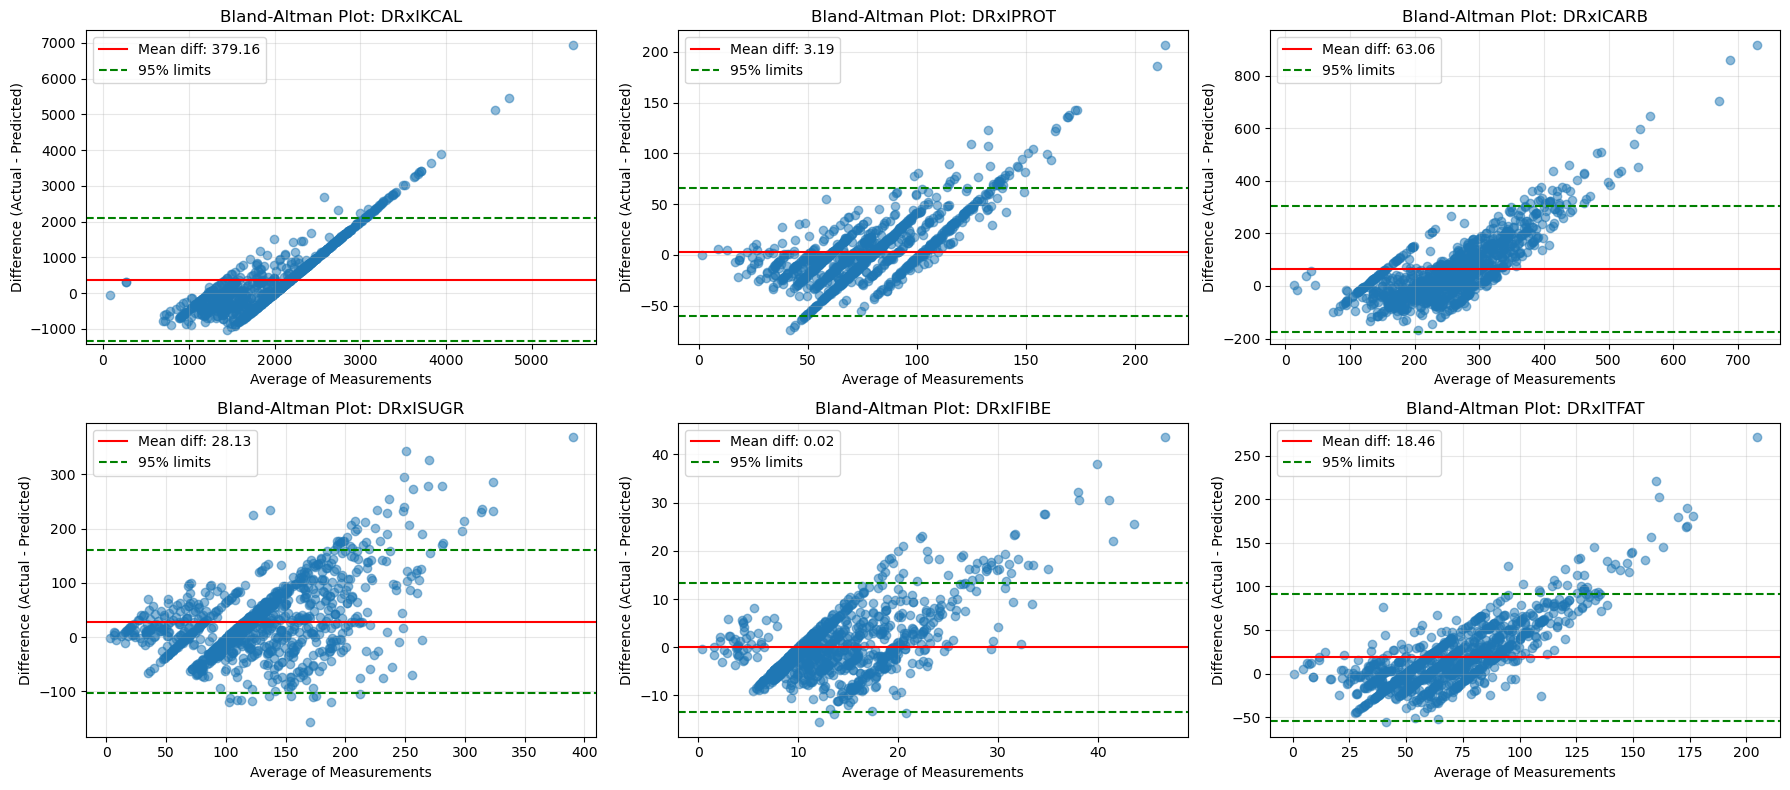

In [14]:
# Function to create Bland-Altman plot
def bland_altman_plot(measure1, measure2, title, ax):
    """Create a Bland-Altman plot comparing two measurement methods"""
    mean_diff = np.mean(measure1 - measure2)
    std_diff = np.std(measure1 - measure2)
    upper_limit = mean_diff + 1.96 * std_diff
    lower_limit = mean_diff - 1.96 * std_diff
    
    # Plot differences against averages
    avg = (measure1 + measure2) / 2
    diff = measure1 - measure2
    
    ax.scatter(avg, diff, alpha=0.5)
    ax.axhline(y=mean_diff, color='r', linestyle='-', label=f'Mean diff: {mean_diff:.2f}')
    ax.axhline(y=upper_limit, color='g', linestyle='--', label='95% limits')
    ax.axhline(y=lower_limit, color='g', linestyle='--')
    
    ax.set_xlabel('Average of Measurements')
    ax.set_ylabel('Difference (Actual - Predicted)')
    ax.set_title(title)
    ax.grid(True, alpha=0.3)
    ax.legend()

# Create figure for Bland-Altman plots
fig, axes = plt.subplots(2, 3, figsize = (18, 8))
axes = axes.ravel()

# Create Bland-Altman plot for each pair
for idx, col in enumerate(base_columns):
    actual = df[col]
    predicted = df[f"{col}_pred_orig"]
    bland_altman_plot(actual, predicted, f'Bland-Altman Plot: {col}', axes[idx])

plt.tight_layout()
plt.show()

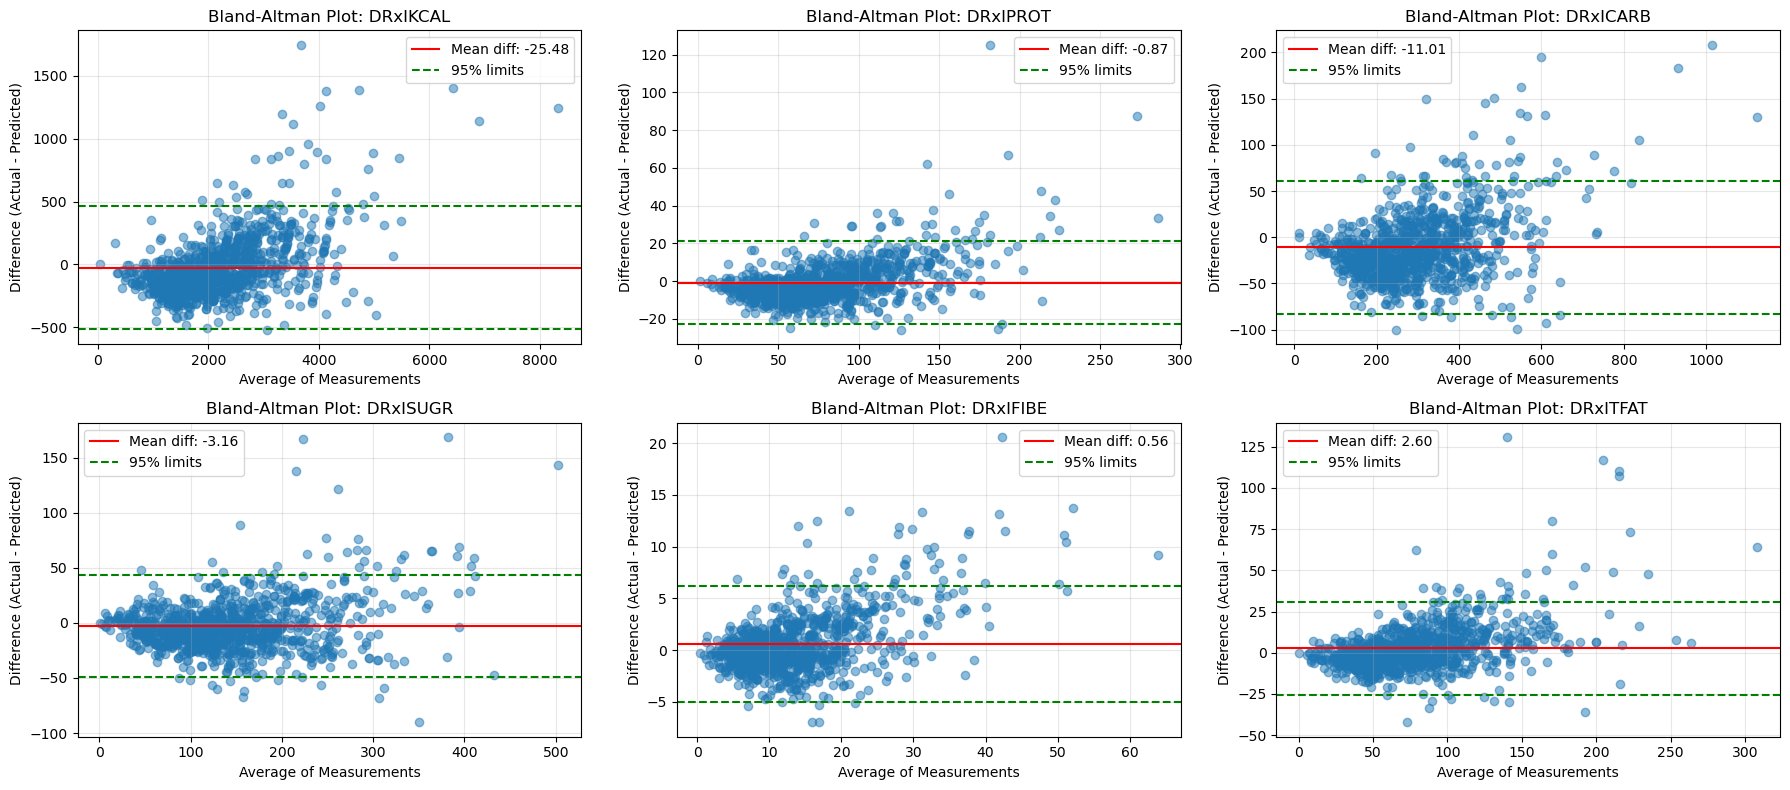

In [15]:
# Function to create Bland-Altman plot
def bland_altman_plot(measure1, measure2, title, ax):
    """Create a Bland-Altman plot comparing two measurement methods"""
    mean_diff = np.mean(measure1 - measure2)
    std_diff = np.std(measure1 - measure2)
    upper_limit = mean_diff + 1.96 * std_diff
    lower_limit = mean_diff - 1.96 * std_diff
    
    # Plot differences against averages
    avg = (measure1 + measure2) / 2
    diff = measure1 - measure2
    
    ax.scatter(avg, diff, alpha=0.5)
    ax.axhline(y=mean_diff, color='r', linestyle='-', label=f'Mean diff: {mean_diff:.2f}')
    ax.axhline(y=upper_limit, color='g', linestyle='--', label='95% limits')
    ax.axhline(y=lower_limit, color='g', linestyle='--')
    
    ax.set_xlabel('Average of Measurements')
    ax.set_ylabel('Difference (Actual - Predicted)')
    ax.set_title(title)
    ax.grid(True, alpha=0.3)
    ax.legend()

# Create figure for Bland-Altman plots
fig, axes = plt.subplots(2, 3, figsize = (18, 8))
axes = axes.ravel()

# Create Bland-Altman plot for each pair
for idx, col in enumerate(base_columns):
    actual = df[col]
    predicted = df[f"{col}_pred_ft"]
    bland_altman_plot(actual, predicted, f'Bland-Altman Plot: {col}', axes[idx])

plt.tight_layout()
plt.show()

# Create plots for Lin's CCC.
Ground truth vs vanilla model.

Ground truth vs fine-tuned mode.


Lin's Concordance Correlation Coefficient Results:
------------------------------------------------------------
Nutrient      CCC
DRxIFIBE 0.463046
DRxIPROT 0.384708
DRxISUGR 0.325920
DRxITFAT 0.170806
DRxICARB 0.133153
DRxIKCAL 0.112581

Overall Statistics:
------------------------------------------------------------
Overall CCC across all nutrients: 0.8222


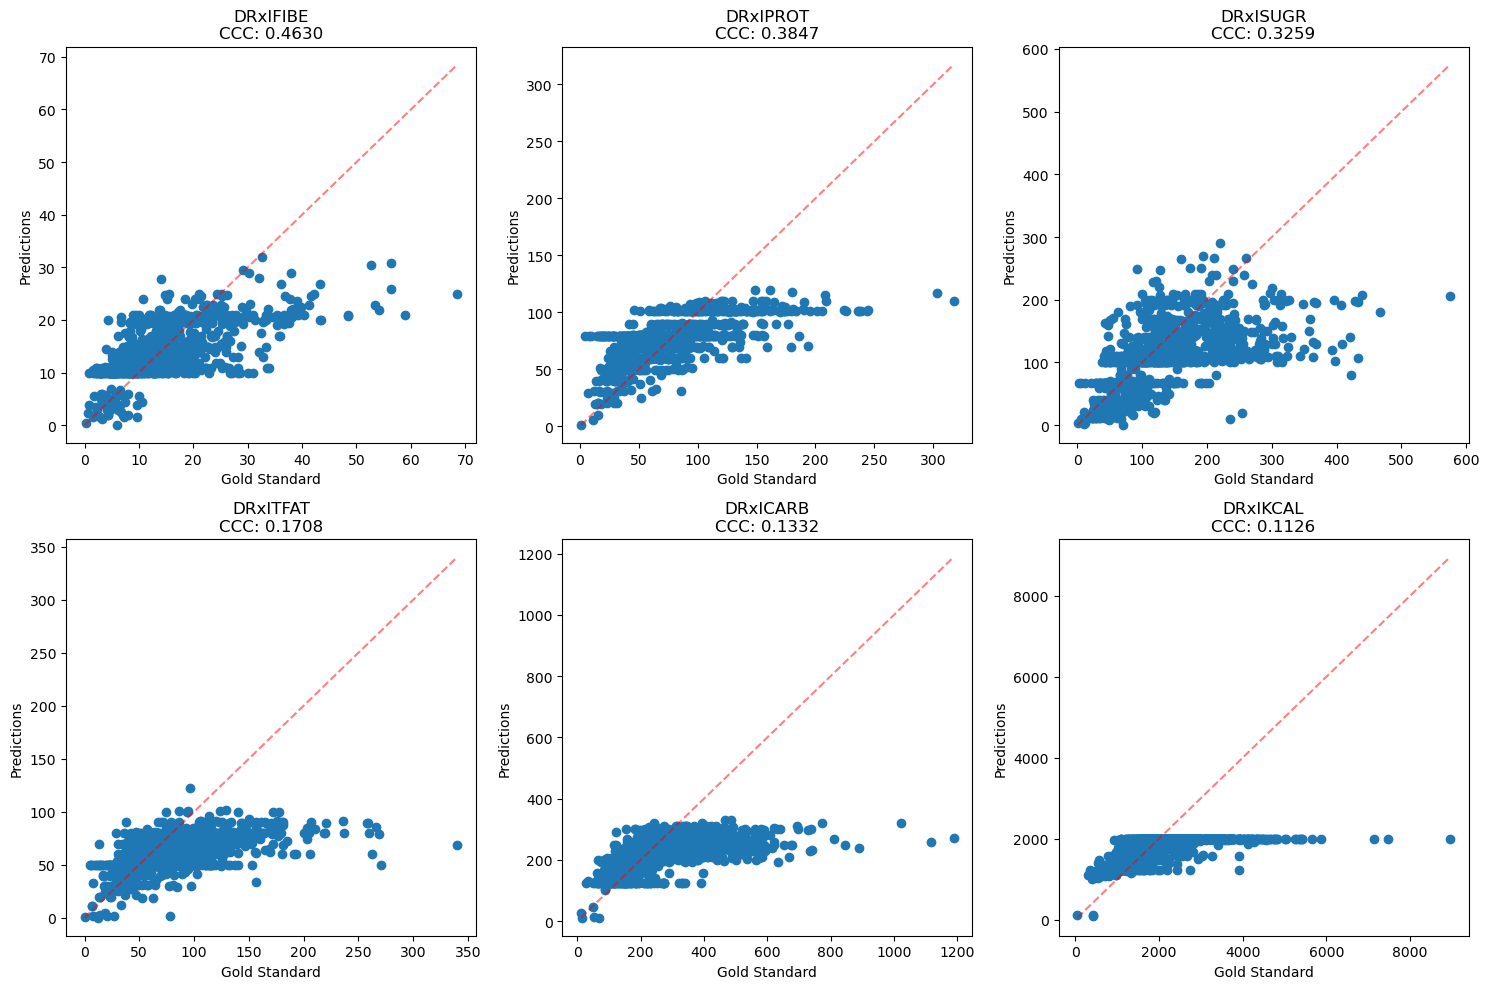

In [16]:
def lin_concordance_correlation(data1, data2):
    """
    Calculate Lin's Concordance Correlation Coefficient between two arrays.
    
    Parameters:
    data1, data2: Arrays containing paired measurements
    
    Returns:
    rho_c: Lin's Concordance Correlation Coefficient
    """
    # Calculate means
    mean1 = np.mean(data1)
    mean2 = np.mean(data2)
    
    # Calculate variances
    var1 = np.var(data1)
    var2 = np.var(data2)
    
    # Calculate covariance
    cov = np.mean((data1 - mean1) * (data2 - mean2))
    
    # Calculate Pearson correlation coefficient
    rho = 2 * cov / (var1 + var2 + (mean1 - mean2)**2)
    
    # Calculate Lin's Concordance Correlation Coefficient
    rho_c = rho * np.sqrt(var1 * var2) / ((var1 + var2)/2 + (mean1 - mean2)**2)
    
    return rho_c

# List of nutrient columns
nutrients_gold = ['DRxIKCAL', 'DRxIPROT', 'DRxICARB', 'DRxISUGR', 'DRxIFIBE', 'DRxITFAT']
nutrients_pred = ['DRxIKCAL_pred_orig', 'DRxIPROT_pred_orig', 'DRxICARB_pred_orig',
                  'DRxISUGR_pred_orig', 'DRxIFIBE_pred_orig', 'DRxITFAT_pred_orig']

# Calculate CCC for each nutrient pair
results = []
for gold_col, pred_col in zip(nutrients_gold, nutrients_pred):
    ccc = lin_concordance_correlation(df[gold_col], df[pred_col])
    results.append({
        'Nutrient': gold_col,
        'CCC': ccc
    })

# Create DataFrame with results
results_df = pd.DataFrame(results)

# Sort by CCC value
results_df = results_df.sort_values('CCC', ascending=False)

# Print results
print("\nLin's Concordance Correlation Coefficient Results:")
print("-" * 60)
print(results_df.to_string(index=False))

# Calculate overall CCC
all_gold = np.concatenate([df[col].values for col in nutrients_gold])
all_pred = np.concatenate([df[col].values for col in nutrients_pred])
overall_ccc = lin_concordance_correlation(all_gold, all_pred)

print("\nOverall Statistics:")
print("-" * 60)
print(f"Overall CCC across all nutrients: {overall_ccc:.4f}")

# Create visualization
plt.figure(figsize=(15, 10))
# Use zip with results_df.itertuples() to match sorted order
for i, row in enumerate(results_df.itertuples()):
    gold_col = row.Nutrient
    pred_col = gold_col + '_pred_orig'
    plt.subplot(2, 3, i + 1)
    plt.scatter(df[gold_col], df[pred_col])
    plt.plot([min(min(df[gold_col]), min(df[pred_col])),
             max(max(df[gold_col]), max(df[pred_col]))],
             [min(min(df[gold_col]), min(df[pred_col])),
              max(max(df[gold_col]), max(df[pred_col]))],
             'r--', alpha=0.5)
    plt.xlabel('Gold Standard')
    plt.ylabel('Predictions')
    plt.title(f'{gold_col}\nCCC: {row.CCC:.4f}')
plt.tight_layout()
plt.show()


Lin's Concordance Correlation Coefficient Results:
------------------------------------------------------------
Nutrient      CCC
DRxIKCAL 0.954660
DRxIPROT 0.947813
DRxISUGR 0.947280
DRxICARB 0.945530
DRxITFAT 0.920829
DRxIFIBE 0.915916

Overall Statistics:
------------------------------------------------------------
Overall CCC across all nutrients: 0.9926


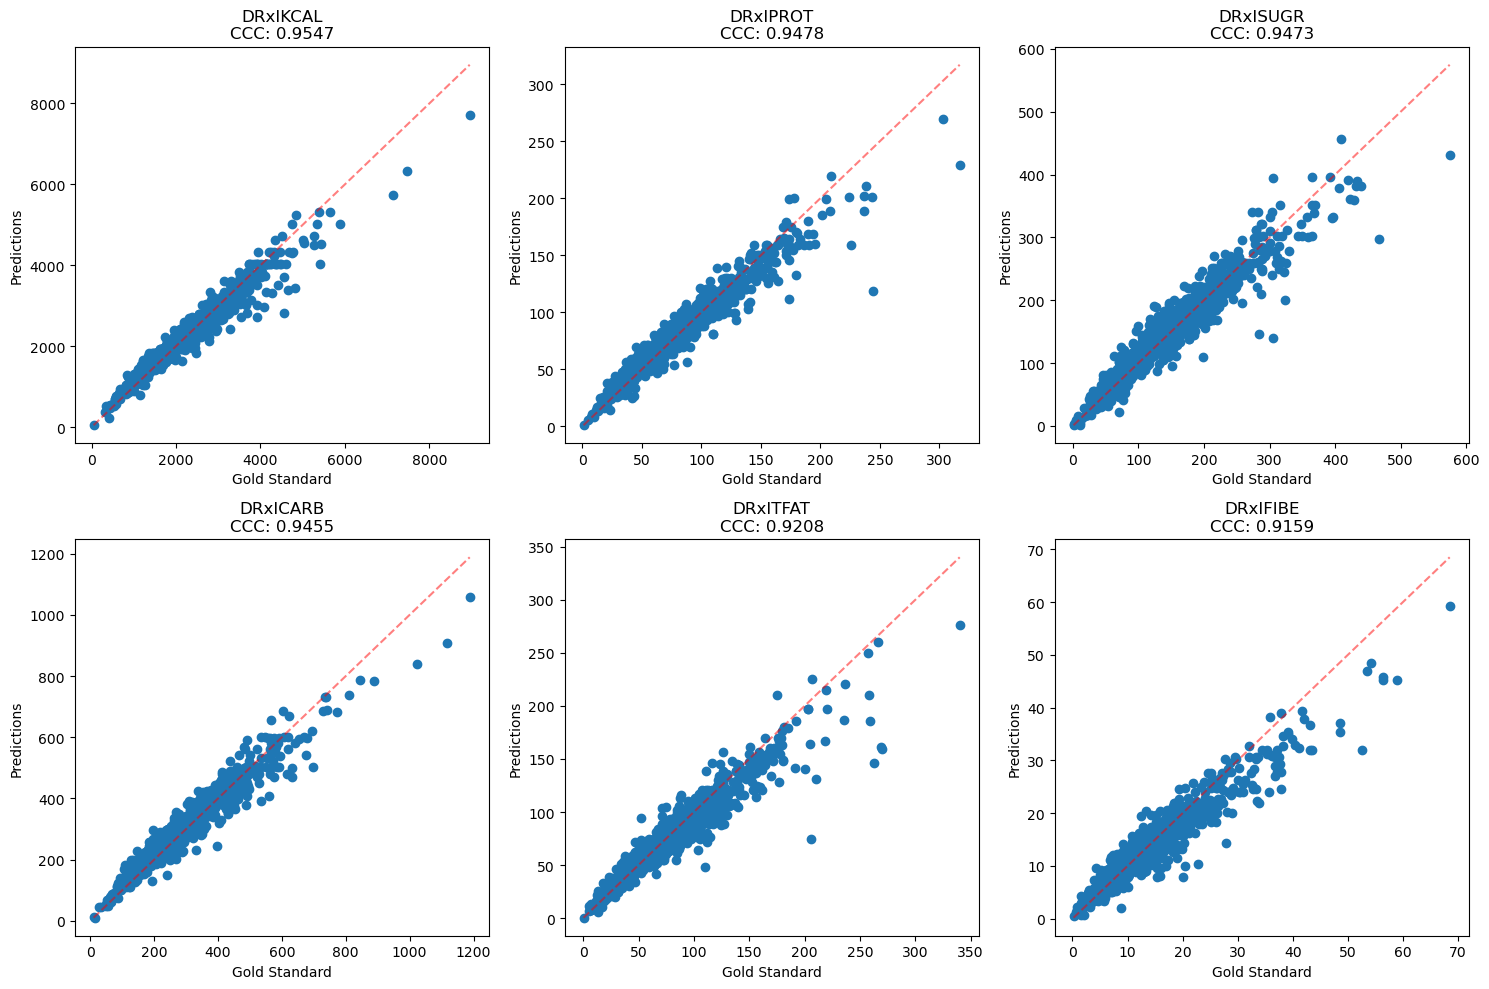

In [17]:
def lin_concordance_correlation(data1, data2):
    """
    Calculate Lin's Concordance Correlation Coefficient between two arrays.
    
    Parameters:
    data1, data2: Arrays containing paired measurements
    
    Returns:
    rho_c: Lin's Concordance Correlation Coefficient
    """
    # Calculate means
    mean1 = np.mean(data1)
    mean2 = np.mean(data2)
    
    # Calculate variances
    var1 = np.var(data1)
    var2 = np.var(data2)
    
    # Calculate covariance
    cov = np.mean((data1 - mean1) * (data2 - mean2))
    
    # Calculate Pearson correlation coefficient
    rho = 2 * cov / (var1 + var2 + (mean1 - mean2)**2)
    
    # Calculate Lin's Concordance Correlation Coefficient
    rho_c = rho * np.sqrt(var1 * var2) / ((var1 + var2)/2 + (mean1 - mean2)**2)
    
    return rho_c

# List of nutrient columns
nutrients_gold = ['DRxIKCAL', 'DRxIPROT', 'DRxICARB', 'DRxISUGR', 'DRxIFIBE', 'DRxITFAT']
nutrients_pred = ['DRxIKCAL_pred_ft', 'DRxIPROT_pred_ft', 'DRxICARB_pred_ft',
                  'DRxISUGR_pred_ft', 'DRxIFIBE_pred_ft', 'DRxITFAT_pred_ft']

# Calculate CCC for each nutrient pair
results = []
for gold_col, pred_col in zip(nutrients_gold, nutrients_pred):
    ccc = lin_concordance_correlation(df[gold_col], df[pred_col])
    results.append({
        'Nutrient': gold_col,
        'CCC': ccc
    })

# Create DataFrame with results
results_df = pd.DataFrame(results)

# Sort by CCC value
results_df = results_df.sort_values('CCC', ascending=False)

# Print results
print("\nLin's Concordance Correlation Coefficient Results:")
print("-" * 60)
print(results_df.to_string(index=False))

# Calculate overall CCC
all_gold = np.concatenate([df[col].values for col in nutrients_gold])
all_pred = np.concatenate([df[col].values for col in nutrients_pred])
overall_ccc = lin_concordance_correlation(all_gold, all_pred)

print("\nOverall Statistics:")
print("-" * 60)
print(f"Overall CCC across all nutrients: {overall_ccc:.4f}")

# Create visualization
plt.figure(figsize=(15, 10))
# Use zip with results_df.itertuples() to match sorted order
for i, row in enumerate(results_df.itertuples()):
    gold_col = row.Nutrient
    pred_col = gold_col + '_pred_ft'
    plt.subplot(2, 3, i + 1)
    plt.scatter(df[gold_col], df[pred_col])
    plt.plot([min(min(df[gold_col]), min(df[pred_col])),
             max(max(df[gold_col]), max(df[pred_col]))],
             [min(min(df[gold_col]), min(df[pred_col])),
              max(max(df[gold_col]), max(df[pred_col]))],
             'r--', alpha=0.5)
    plt.xlabel('Gold Standard')
    plt.ylabel('Predictions')
    plt.title(f'{gold_col}\nCCC: {row.CCC:.4f}')
plt.tight_layout()
plt.show()